## Gradio-games

Create directory and upload urls file into your server with
```
scp -r <local/directory> username@pom-itb-dgx01.campus.pomona.edu:<path/to/server/images/dir>
```

In [1]:
import os
import requests
from bs4 import BeautifulSoup
from fastai.vision.all import *
from fastbook import *
from torchsummary import summary
from torchvision.models import inception_v3

In [2]:
torch.cuda.set_device(2)
default_device()

device(type='cuda', index=2)

In [3]:
# for working around bot protection
google_image = "https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&"
user_agent = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)" +
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"
}


def download_images():
    data = [('gta san andreas', 'gta'), ('nfs', 'nfs'), ('minecraft', 'minecraft')]
    num = 300

    for query, folder in data:
        search_url = google_image + 'q=' + query
        response = requests.get(search_url, headers=user_agent)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        results = soup.findAll('img', {'class': 'rg_i Q4LuWd'})

        count = 1
        links = []
        for result in results:
            try:
                link = result['data-src']
                links.append(link)
                count += 1
                if(count > num): break
            except KeyError: continue

        print(f"Downloading {len(links)} images...")

        for i, link in enumerate(links):
            response = requests.get(link)
            image_name = './NfsGtaMinecraft/' + folder + '/' + str(i+1) + '.jpg'
            with open(image_name, 'wb') as fh: # save images in './NfsGtaMinecraft/'
                fh.write(response.content)

In [4]:
# download and save the images
download_images()

In [5]:
# define path
path = Path('NfsGtaMinecraft/')
path.ls()

(#5) [Path('NfsGtaMinecraft/resnet18-1.pkl'),Path('NfsGtaMinecraft/gta'),Path('NfsGtaMinecraft/resnet18_bruh.pkl'),Path('NfsGtaMinecraft/nfs'),Path('NfsGtaMinecraft/minecraft')]

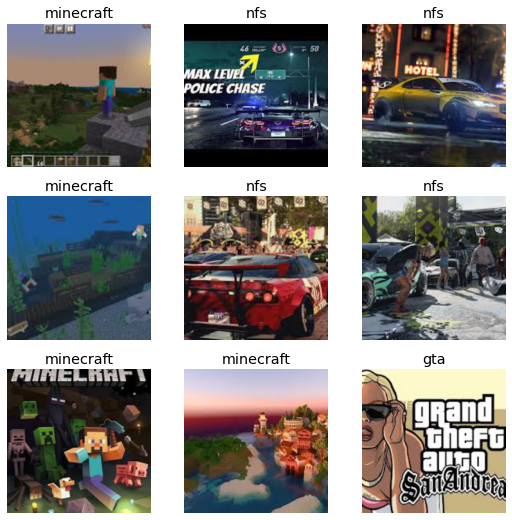

In [6]:
# not sure what we're doing here but ok
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), num_workers=16)
dls.show_batch()

In [7]:
# split into training and validation datasets
print("Training dataset size: \t\t", len(dls.train_ds))
print("Validation dataset size: \t", len(dls.valid_ds))

Training dataset size: 		 192
Validation dataset size: 	 48


In [8]:
# train model
learn = vision_learner(dls, resnet18, metrics=accuracy)

In [9]:
# evaluate model
summary(learn.model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       (9,408)
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Sequential: 2-5                   --
|    |    └─BasicBlock: 3-1              (73,984)
|    |    └─BasicBlock: 3-2              (73,984)
|    └─Sequential: 2-6                   --
|    |    └─BasicBlock: 3-3              (230,144)
|    |    └─BasicBlock: 3-4              (295,424)
|    └─Sequential: 2-7                   --
|    |    └─BasicBlock: 3-5              (919,040)
|    |    └─BasicBlock: 3-6              (1,180,672)
|    └─Sequential: 2-8                   --
|    |    └─BasicBlock: 3-7              (3,673,088)
|    |    └─BasicBlock: 3-8              (4,720,640)
├─Sequential: 1-2                        --
|    └─AdaptiveConcatPool2d: 2-9         --
|    |    └─AdaptiveAvgPool2d: 3-9       --
|    

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       (9,408)
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Sequential: 2-5                   --
|    |    └─BasicBlock: 3-1              (73,984)
|    |    └─BasicBlock: 3-2              (73,984)
|    └─Sequential: 2-6                   --
|    |    └─BasicBlock: 3-3              (230,144)
|    |    └─BasicBlock: 3-4              (295,424)
|    └─Sequential: 2-7                   --
|    |    └─BasicBlock: 3-5              (919,040)
|    |    └─BasicBlock: 3-6              (1,180,672)
|    └─Sequential: 2-8                   --
|    |    └─BasicBlock: 3-7              (3,673,088)
|    |    └─BasicBlock: 3-8              (4,720,640)
├─Sequential: 1-2                        --
|    └─AdaptiveConcatPool2d: 2-9         --
|    |    └─AdaptiveAvgPool2d: 3-9       --
|    

In [10]:
# fine tuning
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.902898,1.125797,0.604167,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.749170,0.451801,0.875000,00:03
1,0.627352,0.339391,0.895833,00:02
2,0.447033,0.266467,0.916667,00:02
3,0.345365,0.229511,0.916667,00:02


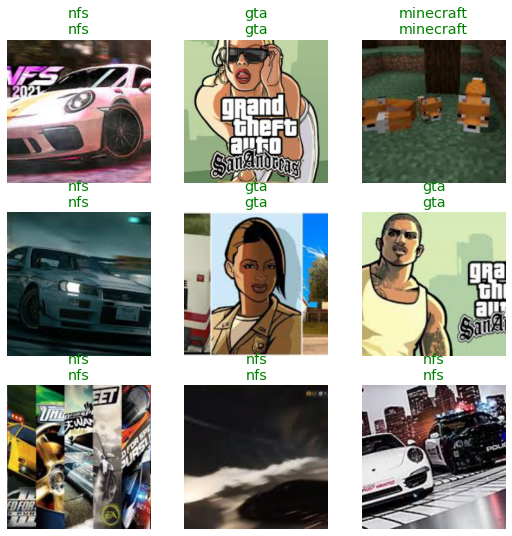

In [11]:
# show prediction results
learn.show_results()

In [12]:
# what's this button do? No, seriously!
interp = ClassificationInterpretation.from_learner(learn)

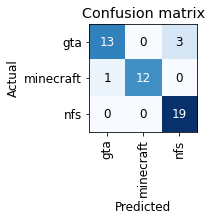

In [13]:
# plot confusion matrix
interp.plot_confusion_matrix(figsize=(3, 3))

In [31]:
# export model
learn.export("./resnet18-1.pkl")
!mv NfsGtaMinecraft/resnet18-1.pkl .

mv: cannot stat '/raid/cs152/datasets/PalmOrPineResized/resnet18_bruh.pkl': No such file or directory
